# Regresión lineal de consumo de combustible  en ciudad por un vehículo respecto a sus emisiones de CO2 con uso de Framework
María Fernanda Torres Alcubilla A01285041

# Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Dataset

Se hace uso de la base de datos [CO2 Emissions](https://www.kaggle.com/datasets/bhuviranga/co2-emissions) obtenida de la plataforma Kaggle. La variable *X* hace referencia a las emisiones de CO2 de un modelo de carro y la variable *y* sobre el rendimiento de este en ciudad.

In [ ]:
df = pd.DataFrame(pd.read_csv('CO2 Emissions.csv'))[['Fuel Consumption City (L/100 km)','CO2 Emissions(g/km)']]
X = df[['CO2 Emissions(g/km)']]
y = df[['Fuel Consumption City (L/100 km)']]

Para realizar la evaluación del modelo se separan los datos, 75% en datos de entrenamiento y 25% en prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

# Modelo

En esta sección se implementará el entrenamiento, modelación, predicción y evaluación del modelo de regresión lineal, usando la librería de *sklearn*.

## Entrenamiento

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train) # entrenamiento con el set de datos correspondientes

LinearRegression()

## Modelo con framework

Como no es regresión multivariada, se tiene la siguiente ecuación que describe al modelo:
$$ y = 0.055x -1.267$$

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", modelo.coef_.flatten())

Intercept: [-1.26721321]
Coeficiente: [0.0551797]


## Predicción

Se realiza la predicción del modelo con el set de prueba

In [ ]:
y_pred = modelo.predict(X = X_test)

En la siguiente gráfica podemos observar las predicciones (azules) y nuestros datos reales (rojos). Las predicciones parecen tener el mismo comportamiento que la primera separación de los datos (la más baja), tomando valores que se acercan más al límite superior de esta. Esto se debe a que los datos de la separación de arriba ayudan a desplazar hacia esta pero no afectan tanto como para perder completamente el comportamiento de la primera separación.

Text(0.5, 1.0, 'Comparación de predicciones y datos reales')

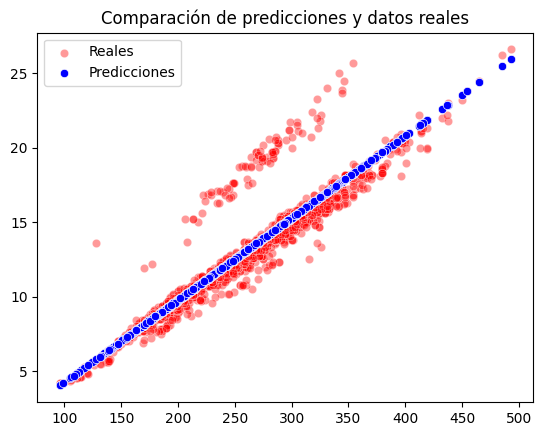

In [ ]:
# Gráfica de datos reales y predicciones
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), color='red', marker='o', alpha = 0.4)
sns.scatterplot(x=X_test.flatten(), y=y_pred.flatten(), color='blue', marker='o')
plt.legend(labels=['Reales','Predicciones'])
plt.title('Comparación de predicciones y datos reales')

## Evaluación

Con el set de prueba se calculó el error cuadrático medio y el coeficiente de determinación.

El RMSE representa la cantidad de error entre la predicción y observación. En promedio se espera que las predicciones  estén alejadas 1.36 unidades del dato real.

Y en cuanto al R^2, este tiene un valor cercano a 1, por lo que se dice que el modelo es fuerte para futuras predicciones.

In [ ]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )
print(f"Error cuadrático medio (rmse): {rmse}")
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Error cuadrático medio (rmse): 1.3663884564302908
Coeficiente de determinación R^2: 0.8456413759036474
